In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
dtypes = {'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float32',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float32',
        'AVProductsEnabled':                                    'float32',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float32',
        'GeoNameIdentifier':                                    'float32',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float32',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float32',
        'IeVerIdentifier':                                      'float32',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float32',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float32',
        'Census_ProcessorManufacturerIdentifier':               'float32',
        'Census_ProcessorModelIdentifier':                      'float32',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float32',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float32',
        'Census_IsFlightsDisabled':                             'float32',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float32',
        'Census_FirmwareManufacturerIdentifier':                'float32',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float32',
        'Census_IsVirtualDevice':                               'float32',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float32',
        'Wdft_IsGamer':                                         'float32',
        'Wdft_RegionIdentifier':                                'float32',
        'HasDetections':                                        'int8'}

In [77]:
df = pd.read_csv('train.csv', low_memory=True)
#df = pd.read_csv('train.csv',dtype=dtypes, low_memory=True)

C:\Users\mathg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [78]:
columncounts = df.describe(include='all').loc[['count']]/df.shape[0]
missingcolumns = columncounts.columns[(columncounts < .75).any(axis=0)]
df_reduce = df.drop(columns=missingcolumns)
df_nonan = df_reduce.dropna()
df = df_nonan

In [79]:
df_y = df['HasDetections'].copy()
df=df.drop(columns='HasDetections')
df=df.drop(columns='MachineIdentifier')
df_y.value_counts(normalize=True)

1    0.50692
0    0.49308
Name: HasDetections, dtype: float64

# AntiVirus Only Aggregate

In [13]:
AVVar_Agg = ['EngineVersion', 'AppVersion', 'AvSigVersion','AVProductStatesIdentifier']
df_AV_agg =df[AVVar_Agg].copy()

In [14]:
#df_AV_agg['AvSigVersion']=df_AV_agg['AvSigVersion'].str.replace('.','')
for col in AVVar_Agg[0:3] :
    df_AV_agg[col]=df_AV_agg[col].str.replace('[.,&,#,x,;]','')
    df_AV_agg[col]=df_AV_agg[col].astype(float)

<ipython-input-14-05610dbbc070>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_AV_agg[col]=df_AV_agg[col].str.replace('[.,&,#,x,;]','')


In [15]:
oldlength = np.zeros(len(AVVar_Agg))
newlength = np.zeros(len(AVVar_Agg))
keptvals = []
threshold = .99
count = 0
df_len = len(df_AV_agg)
ones= np.ones(df_len)

for col in AVVar_Agg :
    temp = df_AV_agg[col]
    temp_unique = df_AV_agg[col].unique()
    oldlength[count] = len(temp_unique)
    print(oldlength[count])
    
    if len(temp_unique) > 10 :
        cumcounts = 0
        temp_counts = temp.value_counts(normalize=True)
        temp_column = np.zeros(len(temp))
        
        for i in range(0,len(temp_counts)):
            cumcounts += temp_counts.values[i]
            #print(cumcounts)
            index = float(temp_counts.index[i])
            temp_column += ones*(temp==index)*index

            if cumcounts > threshold :
                break
        
        temp_column += ones*(temp_column == 0)*-1
        df_AV_agg[col] = temp_column
        
    newlength[count] = len(df_AV_agg[col].unique())
    print(newlength[count])
    count += 1    

60.0
9.0
104.0
28.0
7346.0
1772.0
23107.0
1320.0


# AntiVirus Variables Only

In [80]:
AVVar = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 
               'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'IsProtected', 'SMode', 
               'Firewall', 'UacLuaenable', 'Census_IsFlightsDisabled', 'Census_FlightRing', 'Census_IsSecureBootEnabled']
df_AV = df[AVVar].copy()
df_AV[AVVar_Agg] = df_AV_agg
df_AV_non_agg = df[AVVar].copy()

In [9]:
AVcolumns = df_AV.columns
for col in AVcolumns :
    print(df_AV[col].value_counts(normalize=True))
    print()

win8defender     9.993450e-01
mse              6.546817e-04
scep             1.392643e-07
mseprerelease    1.392643e-07
Name: ProductName, dtype: float64

1.1.15200.1    4.547128e-01
1.1.15100.1    4.485977e-01
1.1.15000.2    3.237715e-02
1.1.14901.4    2.586779e-02
1.1.14800.3    1.646508e-02
1.1.14700.5    5.611517e-03
1.1.15300.6    4.979257e-03
1.1.14600.4    3.104898e-03
1.1.14104.0    1.790382e-03
1.1.15300.5    1.755845e-03
1.1.13504.0    1.011338e-03
1.1.14500.5    4.846399e-04
1.1.14405.2    4.328336e-04
1.1.15000.1    3.058245e-04
1.1.14306.0    2.945441e-04
1.1.14901.3    1.919063e-04
1.1.14003.0    1.800688e-04
1.1.14202.0    1.654460e-04
1.1.14700.3    1.584828e-04
1.1.13303.0    1.478987e-04
1.1.13407.0    1.456705e-04
1.1.13804.0    1.417711e-04
1.1.13903.0    1.366183e-04
1.1.14700.4    1.334152e-04
1.1.14800.1    1.165643e-04
1.1.13601.0    1.065372e-04
1.1.12902.0    8.690095e-05
1.1.13701.0    8.049479e-05
1.1.13704.0    7.506348e-05
1.1.13103.0    7.506348e-05
1.1.1

In [42]:
df_AV_53447 = df_AV[df_AV['AVProductStatesIdentifier']==53447].copy()
dy_AV_53447 = df_y[df_AV['AVProductStatesIdentifier']==53447].copy()

In [13]:
AV_53447_columns = df_AV_53447.columns
for col in AV_53447_columns :
    print(df_AV_53447[col].value_counts(normalize=True))
    print()

win8defender    1.0
Name: ProductName, dtype: float64

1.1.15200.1    4.691521e-01
1.1.15100.1    4.619270e-01
1.1.15000.2    2.486513e-02
1.1.14901.4    1.796644e-02
1.1.14800.3    1.048735e-02
1.1.15300.6    5.473664e-03
1.1.14700.5    3.240538e-03
1.1.14600.4    2.117087e-03
1.1.15300.5    1.867061e-03
1.1.14104.0    1.089432e-03
1.1.13504.0    5.973091e-04
1.1.14500.5    1.642496e-04
1.1.15000.1    1.602842e-04
1.1.14405.2    1.492229e-04
1.1.14901.3    1.047691e-04
1.1.14306.0    8.723802e-05
1.1.14700.3    7.680285e-05
1.1.14700.4    5.718473e-05
1.1.14800.1    5.259325e-05
1.1.14202.0    4.654086e-05
1.1.14003.0    3.861013e-05
1.1.13903.0    3.694050e-05
1.1.13804.0    3.214032e-05
1.1.13303.0    2.838366e-05
1.1.13407.0    2.587922e-05
1.1.13601.0    2.128775e-05
1.1.12902.0    2.107904e-05
1.1.13103.0    1.878331e-05
1.1.13202.0    1.711368e-05
1.1.13000.0    1.502664e-05
1.1.13701.0    1.419183e-05
1.1.13704.0    1.398313e-05
1.1.14305.0    1.377442e-05
1.1.12805.0    1.0643

In [25]:
binary = ['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'IsProtected', 'SMode', 
               'Firewall', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled']
categorical = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield', 
               'AVProductsInstalled', 'AVProductsEnabled', 'UacLuaenable', 'Census_FlightRing']

bnum = len(binary)
cnum = len(categorical)

df_AV_binary_index = []
df_AV_binary_values = []
df_AV_53447_binary_index = []
df_AV_53447_binary_values = []

df_AV_cat_index = []
df_AV_cat_values = []
df_AV_53447_cat_index = []
df_AV_53447_cat_values = []

for bcol in binary :
    temp_AV_vc = df_AV[bcol].value_counts(normalize=True)
    temp_AV_53447_vc = df_AV_53447[bcol].value_counts(normalize=True)
    
    if temp_AV_vc.index[0] == temp_AV_53447_vc.index[0] :
    
        df_AV_binary_index.append(temp_AV_vc.index[0])
        df_AV_binary_values.append(temp_AV_vc.values[0])
        df_AV_53447_binary_index.append(temp_AV_53447_vc.index[0])
        df_AV_53447_binary_values.append(temp_AV_53447_vc.values[0])   
        
    else :
        df_AV_binary_index.append(temp_AV_vc.index[1])
        df_AV_binary_values.append(temp_AV_vc.values[1])
        df_AV_53447_binary_index.append(temp_AV_53447_vc.index[0])
        df_AV_53447_binary_values.append(temp_AV_53447_vc.values[0])
    

for ccol in categorical :
    temp_AV_vc = df_AV[ccol].value_counts(normalize=True)
    temp_AV_53447_vc = df_AV_53447[ccol].value_counts(normalize=True)
    
    if temp_AV_vc.index[0] == temp_AV_53447_vc.index[0] :
    
        df_AV_cat_index.append(temp_AV_vc.index[0])
        df_AV_cat_values.append(temp_AV_vc.values[0])
        df_AV_53447_cat_index.append(temp_AV_53447_vc.index[0])
        df_AV_53447_cat_values.append(temp_AV_53447_vc.values[0])   
        
    else :
        df_AV_cat_index.append(temp_AV_vc.index[1])
        df_AV_cat_values.append(temp_AV_vc.values[1])
        df_AV_53447_cat_index.append(temp_AV_53447_vc.index[0])
        df_AV_53447_cat_values.append(temp_AV_53447_vc.values[0])
        


In [45]:
    temp_AV_vc = df_y.value_counts(normalize=True)
    temp_AV_53447_vc = dy_AV_53447.value_counts(normalize=True)
    
    if temp_AV_vc.index[0] == temp_AV_53447_vc.index[0] :
    
        df_AV_binary_index.append(temp_AV_vc.index[0])
        df_AV_binary_values.append(temp_AV_vc.values[0])
        df_AV_53447_binary_index.append(temp_AV_53447_vc.index[0])
        df_AV_53447_binary_values.append(temp_AV_53447_vc.values[0])   

In [46]:
print(df_AV_binary_index)
print(df_AV_binary_values)
print(df_AV_53447_binary_index)
print(df_AV_53447_binary_values)

print(df_AV_cat_index)
print(df_AV_cat_values)
print(df_AV_53447_cat_index)
print(df_AV_53447_cat_values)

[0, 0, 1, 1.0, 0.0, 1.0, 0.0, 0, 1]
[0.9999987466209248, 0.9818375623503866, 0.9985070862571301, 0.9568521468085696, 0.9995319325475946, 0.9796572398169565, 0.9999891373813485, 0.4978003893552465, 0.5069195577131625]
[0, 0, 1, 1.0, 0.0, 1.0, 0.0, 0, 1]
[0.9999987477796568, 0.9999730772626213, 0.999051025683248, 1.0, 0.9993081482603842, 0.9803274097049999, 0.9999847646524911, 0.5691341459825954, 0.5629400380549763]
['win8defender', '1.1.15200.1', '4.18.1807.18075', '1.273.1420.0', 7.0, 1.0, 1.0, 1.0, 'Retail']
[0.9993450398010525, 0.45471283762376596, 0.6310599311560653, 0.01258225474261234, 0.9733906229697871, 0.6961033419403339, 0.9779625320429842, 0.9955503650188028, 0.9413562035092108]
['win8defender', '1.1.15200.1', '4.18.1807.18075', '1.273.1420.0', 7.0, 1.0, 1.0, 1.0, 'Retail']
[1.0, 0.46915207360384215, 0.6859450162569506, 0.012833171483853975, 0.9962516871060332, 1.0, 1.0, 0.9954469268321392, 0.9381542981732819]


In [47]:
xticks_label = []
for i in range(0,len(binary)) :
    if df_AV_binary_index[i] > 0 :
        xticks_label.append(binary[i]+': True')
    else :
        xticks_label.append(binary[i]+': False')

xticks_label.append('HasDetections: True')


In [56]:
xticks_label

['IsBeta: False',
 'IsSxsPassiveMode: False',
 'HasTpm: True',
 'IsProtected: True',
 'SMode: False',
 'Firewall: True',
 'Census_IsFlightsDisabled: False',
 'Census_IsSecureBootEnabled: False',
 'HasDetections: True']

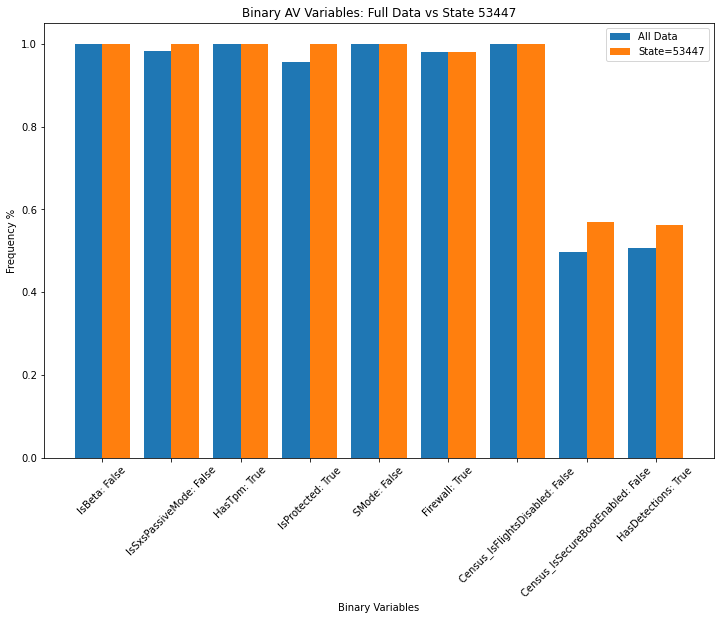

In [54]:
plt.figure(figsize=(12, 8))

X_axis = np.arange(len(xticks_label))
  
plt.bar(X_axis - 0.2, df_AV_binary_values, 0.4, label = 'All Data')
plt.bar(X_axis + 0.2, df_AV_53447_binary_values, 0.4, label = 'State=53447')
  
plt.xticks(X_axis, xticks_label)
plt.xticks(rotation=45)

plt.xlabel("Binary Variables")
plt.ylabel("Frequency %")
plt.title("Binary AV Variables: Full Data vs State 53447")

plt.legend()
plt.show()

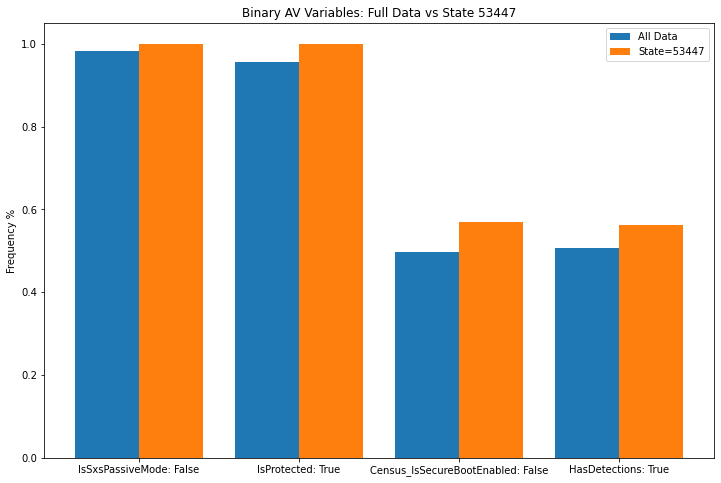

In [63]:
All_Freq = [ 0.9818375623503866, 0.9568521468085696, 0.4978003893552465, 0.5069195577131625]
S53447_Freq = [ 0.9999730772626213, 1.0, 0.5691341459825954, 0.5629400380549763]
Ticks_Label = ['IsSxsPassiveMode: False','IsProtected: True','Census_IsSecureBootEnabled: False','HasDetections: True']

plt.figure(figsize=(12, 8))

X_axis = np.arange(len(Ticks_Label))
  
plt.bar(X_axis - 0.2, All_Freq, 0.4, label = 'All Data')
plt.bar(X_axis + 0.2, S53447_Freq, 0.4, label = 'State=53447')
  
plt.xticks(X_axis, Ticks_Label)
plt.xticks(rotation=0)

#plt.xlabel("Binary Variables")
plt.ylabel("Frequency %")
plt.title("Binary AV Variables: Full Data vs State 53447")

plt.legend()
plt.show()

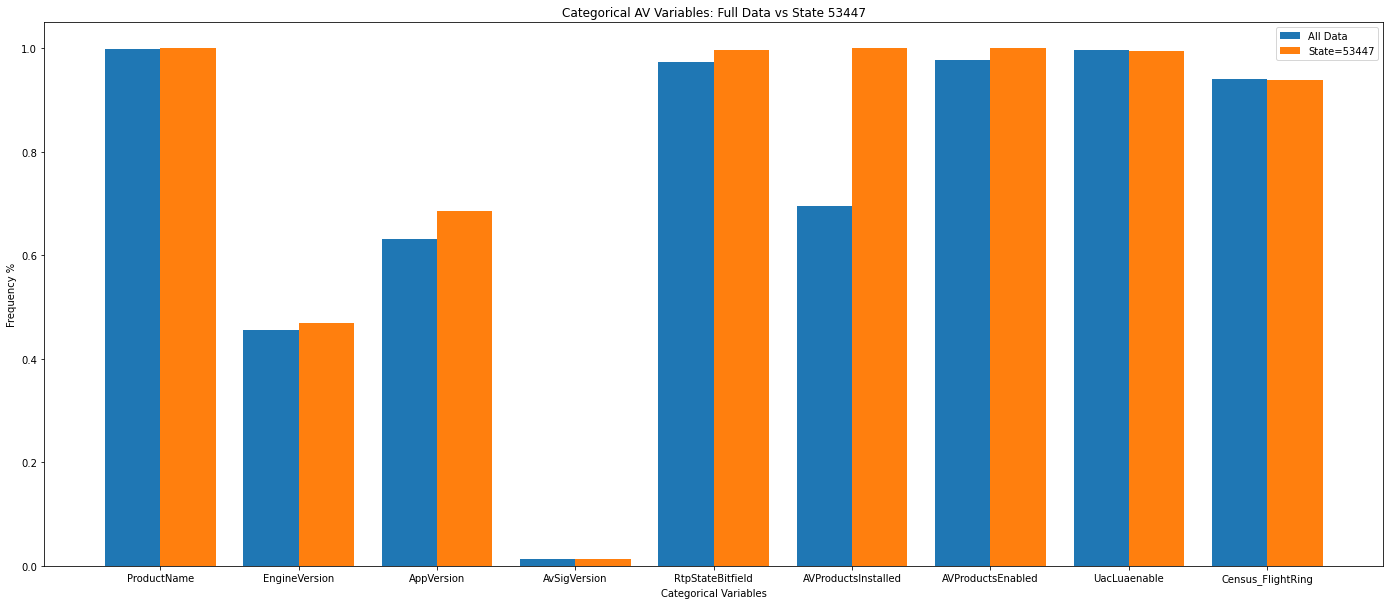

In [73]:
plt.figure(figsize=(24, 10))

X_axis = np.arange(len(categorical))
  
plt.bar(X_axis - 0.2, df_AV_cat_values, 0.4, label = 'All Data')
plt.bar(X_axis + 0.2, df_AV_53447_cat_values, 0.4, label = 'State=53447')
  
plt.xticks(X_axis, categorical)
plt.xticks(rotation=0)

plt.xlabel("Categorical Variables")
plt.ylabel("Frequency %")
plt.title("Categorical AV Variables: Full Data vs State 53447")

plt.legend()#loc='center left')
plt.show()

In [93]:
print(categorical)
print(df_AV_cat_values)
print(df_AV_53447_cat_values)

['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield', 'AVProductsInstalled', 'AVProductsEnabled', 'UacLuaenable', 'Census_FlightRing']
[0.9993450398010525, 0.45471283762376596, 0.6310599311560653, 0.01258225474261234, 0.9733906229697871, 0.6961033419403339, 0.9779625320429842, 0.9955503650188028, 0.9413562035092108]
[1.0, 0.46915207360384215, 0.6859450162569506, 0.012833171483853975, 0.9962516871060332, 1.0, 1.0, 0.9954469268321392, 0.9381542981732819]


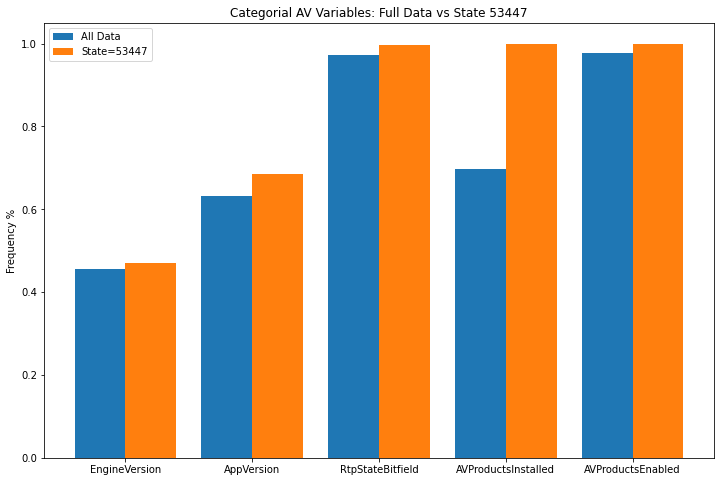

In [94]:
All_Freq = [0.45471283762376596, 0.6310599311560653, 0.9733906229697871, 0.6961033419403339, 0.9779625320429842]
S53447_Freq = [0.46915207360384215, 0.6859450162569506, 0.9962516871060332, 1.0, 1.0]
Ticks_Label = ['EngineVersion', 'AppVersion', 'RtpStateBitfield', 'AVProductsInstalled', 'AVProductsEnabled']

plt.figure(figsize=(12, 8))

X_axis = np.arange(len(Ticks_Label))
  
plt.bar(X_axis - 0.2, All_Freq, 0.4, label = 'All Data')
plt.bar(X_axis + 0.2, S53447_Freq, 0.4, label = 'State=53447')
  
plt.xticks(X_axis, Ticks_Label)
plt.xticks(rotation=0)

#plt.xlabel("Binary Variables")
plt.ylabel("Frequency %")
plt.title("Categorial AV Variables: Full Data vs State 53447")

plt.legend()
plt.show()

In [75]:
df_53447 = df[df['AVProductStatesIdentifier']==53447]

In [81]:
columns = df.columns
lastcolumns =[]
for col in columns :
    if col not in binary and col not in categorical :
        lastcolumns.append(col)

In [88]:
lastcolumns

['AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'AutoSampleOptIn',
 'IeVerIdentifier',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_

In [83]:
lnum = len(lastcolumns)

df_last_index = []
df_last_values = []
df_53447_last_index = []
df_53447_last_values = []

for lcol in lastcolumns :
    temp_vc = df[lcol].value_counts(normalize=True)
    temp_53447_vc = df_53447[lcol].value_counts(normalize=True)
    
    if temp_vc.index[0] == temp_53447_vc.index[0] :
    
        df_last_index.append(temp_vc.index[0])
        df_last_values.append(temp_vc.values[0])
        df_53447_last_index.append(temp_53447_vc.index[0])
        df_53447_last_values.append(temp_53447_vc.values[0])   
        
    else :
        df_last_index.append(temp_vc.index[1])
        df_last_values.append(temp_vc.values[1])
        df_53447_last_index.append(temp_53447_vc.index[0])
        df_53447_last_values.append(temp_53447_vc.values[0])

In [89]:
print(len(df_last_index))
print(df_53447_last_index)

55
[53447.0, 43, 130775.0, 277.0, 75, 'windows10', 'x64', '10.0.0.0', 17134, 768, 'rs4', '17134.1.amd64fre.rs4_release.180410-1804', 'Home', 0, 137.0, 'Notebook', 'Windows.Desktop', 2668.0, 313586.0, 4.0, 5.0, 2697.0, 476940.0, 'HDD', 28542.0, 0, 4096.0, 'Notebook', 15.5, 1366.0, 768.0, 'Mobile', 0.0, '10.0.17134.228', 'amd64', 'rs4_release', 17134, 228, 'Professional', 'PROFESSIONAL', 'UUPUpgrade', 8.0, 31, 'FullAuto', 0, 'IS_GENUINE', 'Retail', 142.0, 33105.0, 0.0, 0, 0, 0.0, 0.0, 10.0]


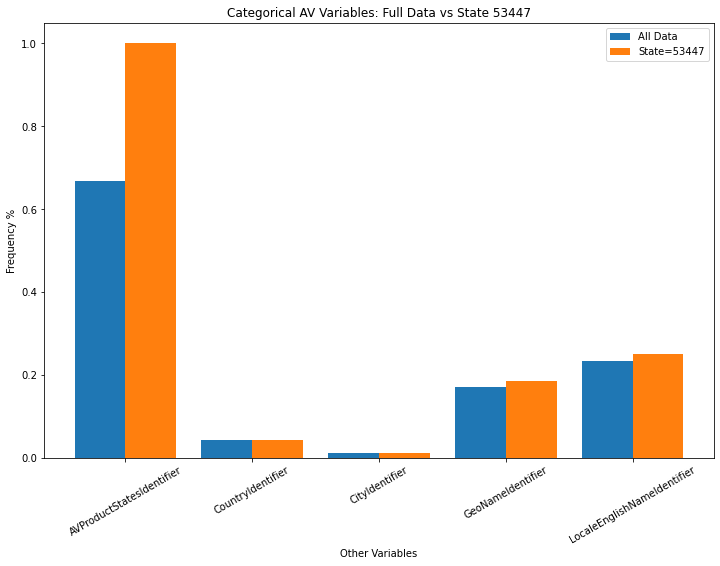

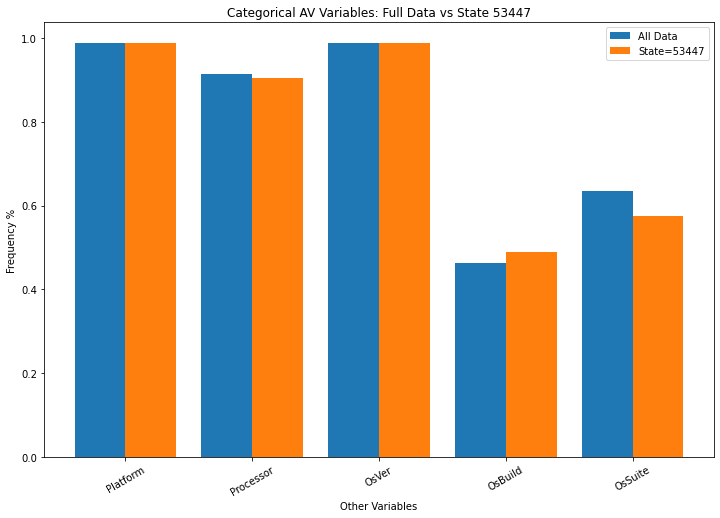

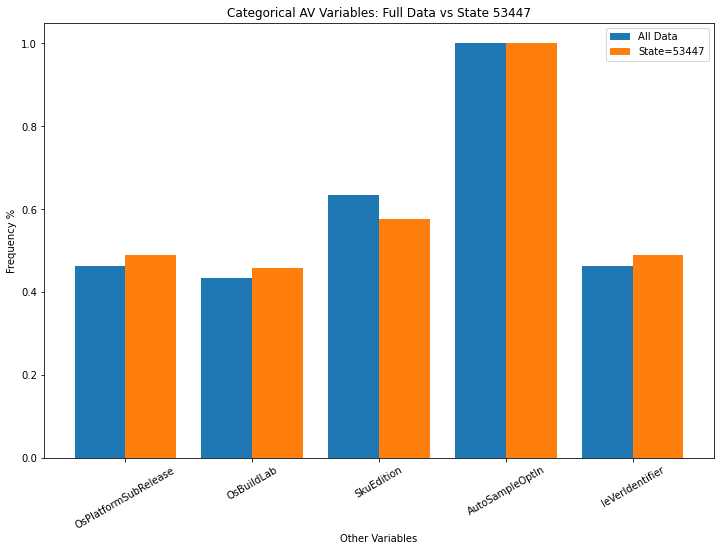

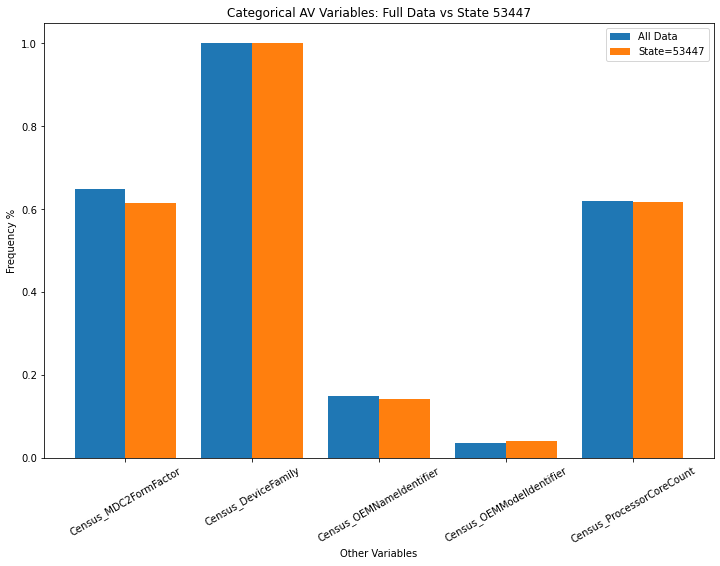

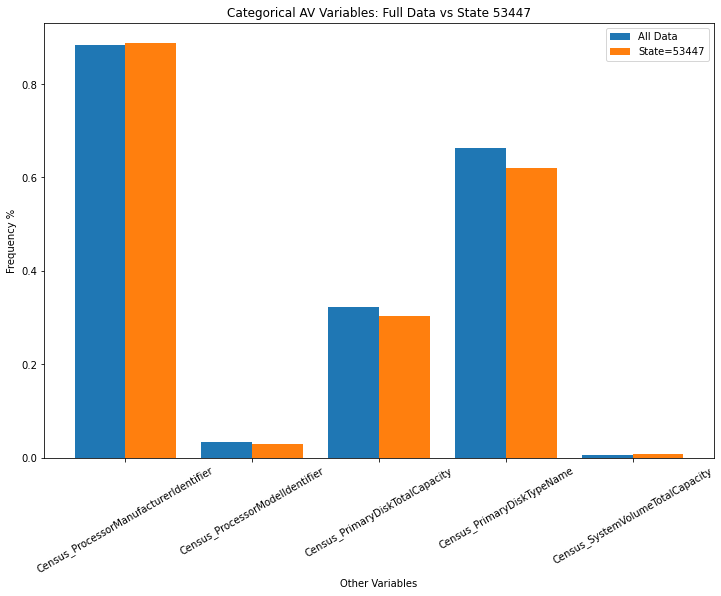

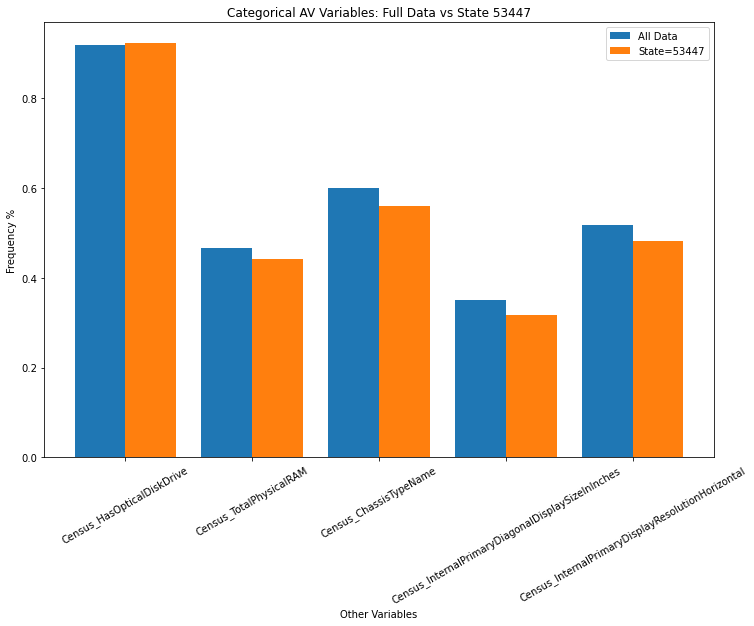

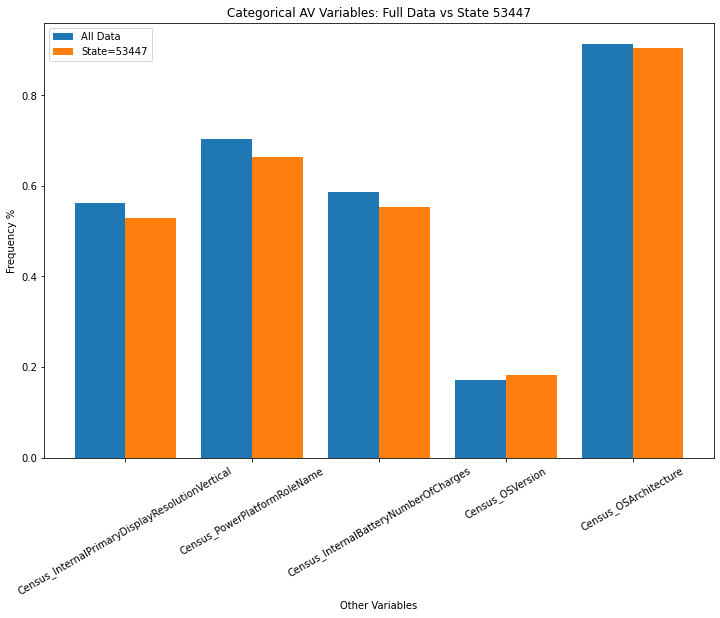

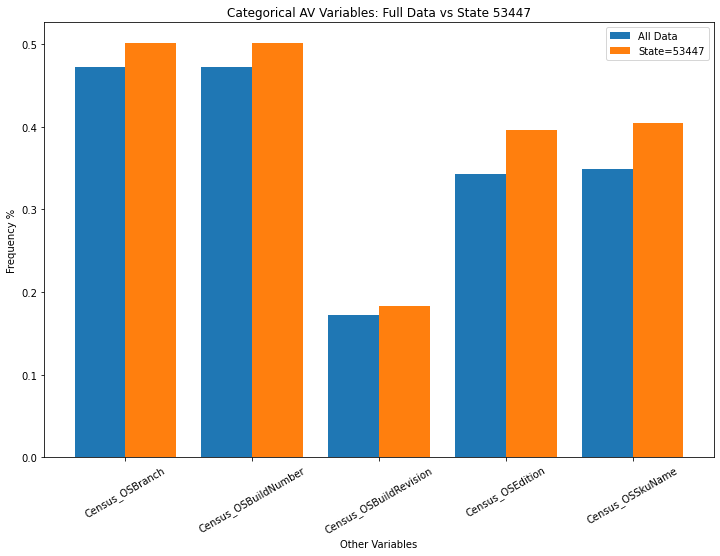

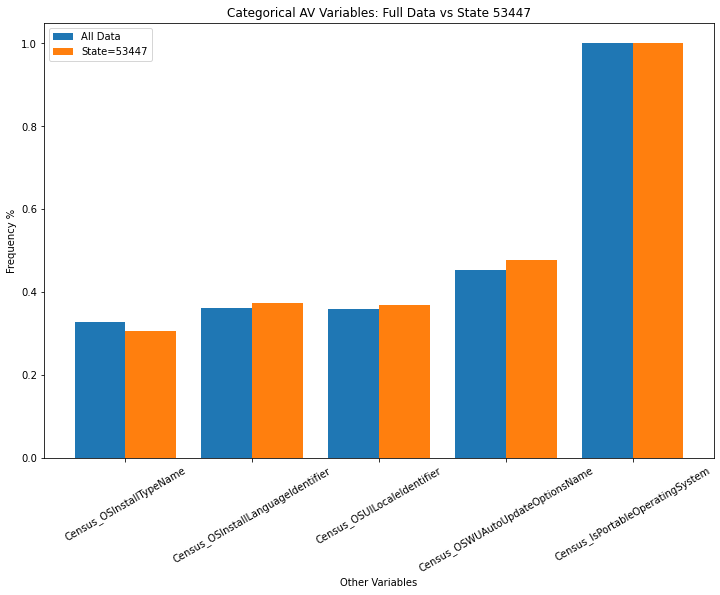

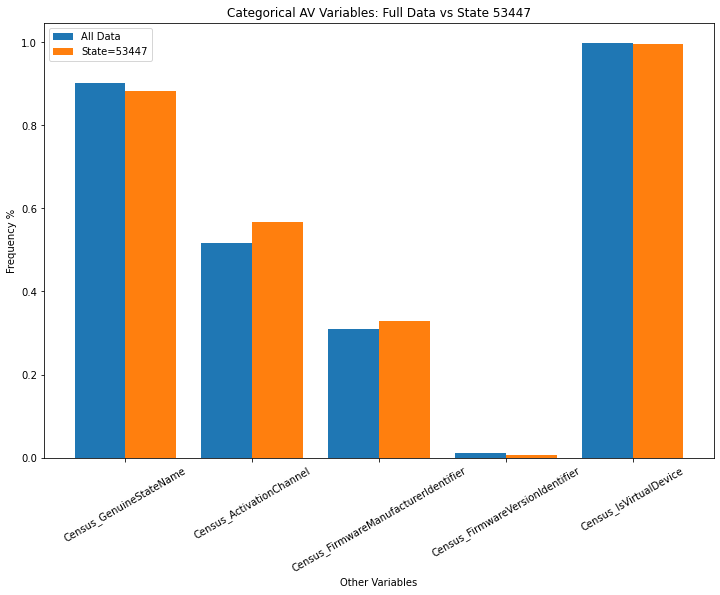

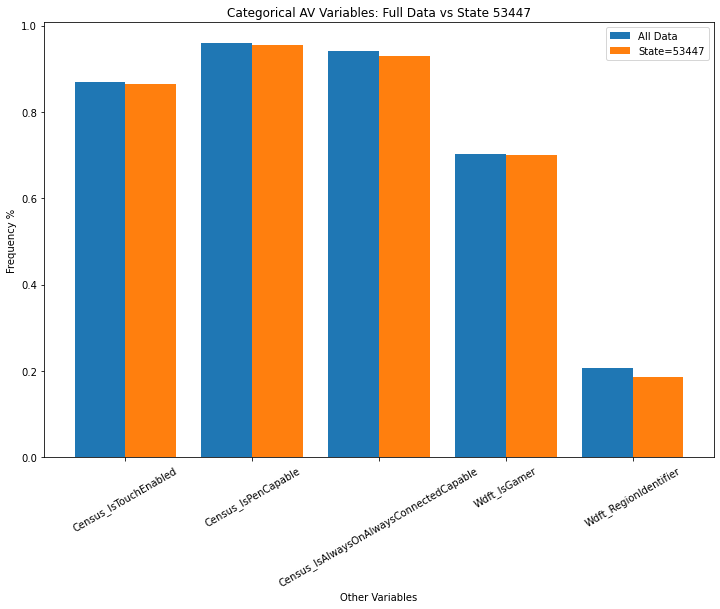

In [92]:
for i in range(0,11) :
    plt.figure(figsize=(12, 8))

    X_axis = np.arange(len(lastcolumns[5*i:5*(i+1)]))
  
    plt.bar(X_axis - 0.2, df_last_values[5*i:5*(i+1)], 0.4, label = 'All Data')
    plt.bar(X_axis + 0.2, df_53447_last_values[5*i:5*(i+1)], 0.4, label = 'State=53447')
  
    plt.xticks(X_axis, lastcolumns[5*i:5*(i+1)])
    plt.xticks(rotation=30)

    plt.xlabel("Other Variables")
    plt.ylabel("Frequency %")
    plt.title("Categorical AV Variables: Full Data vs State 53447")

    plt.legend()#loc='center left')
    plt.show()